Diagonalization of a matrix is a ubiquitous problem in linear algebra applications. For example in decomposing a 2 qubit unitary to its quantum circuit reprentation requires diagonalization. 

$$ 
U = V D V^\dagger
$$

where $D$ is a diagonal matrix, containing the eigenvalues of $U$, $V$ is the matrix that contains the left eigenvectors of $A$ as column vectors. Unitary matrices are normal matrices, hence they are always diagonalizable. 

In python and the numpy package, the `np.linalg.eig` and `np.linalg.eigh` methods are to calculate $D$ and $V$. 



In [523]:
import numpy as np
import cirq 
import matplotlib.pyplot as plt 

In [524]:
np.set_printoptions(suppress=True, precision=2)
U = cirq.testing.random_unitary(8)
U

array([[-0.01+0.17j, -0.29-0.19j,  0.1 +0.26j,  0.33+0.j  , -0.28+0.26j,
         0.18-0.27j, -0.03+0.38j,  0.18+0.48j],
       [ 0.34+0.25j, -0.05+0.06j, -0.22-0.63j, -0.01+0.22j,  0.1 -0.16j,
         0.34+0.01j,  0.16-0.09j,  0.2 +0.32j],
       [-0.03-0.44j,  0.05-0.1j ,  0.01+0.04j, -0.16-0.46j,  0.15-0.32j,
         0.45-0.04j,  0.32+0.31j, -0.09+0.11j],
       [-0.27+0.31j, -0.21-0.18j, -0.32-0.21j,  0.22-0.65j, -0.06+0.07j,
        -0.  +0.04j, -0.03-0.31j, -0.17-0.04j],
       [ 0.27+0.35j,  0.13-0.32j,  0.31-0.05j, -0.04-0.16j, -0.29-0.42j,
         0.05-0.14j, -0.17+0.15j,  0.2 -0.41j],
       [-0.  +0.22j, -0.56+0.15j, -0.08+0.22j,  0.19+0.24j,  0.29-0.39j,
         0.01-0.13j,  0.21+0.11j, -0.3 -0.26j],
       [-0.02-0.18j, -0.26-0.23j, -0.12-0.06j, -0.05-0.04j, -0.04-0.41j,
        -0.59+0.34j, -0.03+0.13j,  0.26+0.32j],
       [ 0.2 -0.33j, -0.41-0.2j ,  0.4 +0.07j,  0.05-0.j  ,  0.11-0.02j,
         0.24+0.04j, -0.26-0.57j,  0.06+0.06j]])

In [525]:
d, V= np.linalg.eig(U)
d, V

(array([ 0.92+0.39j,  0.16+0.99j, -0.6 +0.8j , -0.93+0.36j, -0.66-0.75j,
         0.81-0.58j, -0.12-0.99j,  0.33-0.95j]),
 array([[ 0.56+0.j  ,  0.02-0.19j, -0.02+0.48j, -0.35-0.15j, -0.25-0.17j,
         -0.  +0.17j, -0.28+0.1j ,  0.06+0.23j],
        [-0.1 +0.15j, -0.15-0.39j,  0.55+0.j  ,  0.17-0.13j, -0.17-0.14j,
         -0.22+0.29j,  0.3 -0.15j, -0.37+0.17j],
        [ 0.13-0.49j,  0.29-0.04j, -0.24-0.39j, -0.09-0.22j, -0.3 -0.29j,
         -0.19-0.18j,  0.36+0.03j, -0.05+0.15j],
        [ 0.09+0.41j,  0.06-0.02j, -0.03+0.13j,  0.06+0.09j, -0.14-0.13j,
          0.24-0.02j,  0.62+0.j  ,  0.56+0.j  ],
        [ 0.13-0.07j, -0.21+0.09j, -0.03+0.17j, -0.41+0.22j,  0.52+0.j  ,
         -0.04-0.24j,  0.36-0.28j, -0.23+0.31j],
        [ 0.05+0.14j,  0.54+0.j  ,  0.24+0.03j,  0.12+0.02j, -0.1 +0.5j ,
         -0.03-0.34j, -0.09-0.09j,  0.01+0.46j],
        [-0.05-0.28j,  0.25+0.41j,  0.15+0.24j,  0.04-0.48j,  0.27+0.12j,
          0.  +0.47j,  0.17-0.14j,  0.16-0.02j],
        [ 0.05-0.

In [526]:
np.testing.assert_allclose(V @ np.diag(d) @ V.conj().T, U)

Great, this seems to work for random unitaries. However, for certain unitaries this starts to crumble. 

### The main question: what classes of matrices result in incorrect `numpy.linalg.eig` decomposition? More specifically: what kind of numerical errors cause these errors and can we correct them? 

## An example $U_1U_2^\dagger$

In [504]:
u2=np.array(
[[ 6.3616870250576751e-01+7.7154998668403085e-01j,  7.4915966813003955e-18+4.2843403189465048e-17j, -1.0670468446714549e-16+1.1538031985852377e-16j,  7.2296961594819082e-19+5.4038459512872594e-18j],
 [ 8.4978997301802701e-17+1.1893895609896763e-16j,  2.2035859738533992e-01+1.1292208651931387e-01j,  6.6484970601421378e-01-7.0383935318155111e-01j, -2.2722217185744742e-02-2.7557668741074088e-02j],
 [ 1.6640839446779151e-17-3.2997465454912499e-17j, -2.2087747199836227e-01+4.4261359188593208e-01j, -1.1725777733627676e-01-1.0588094072445392e-01j,  6.1988112341373613e-01-5.8829718979630630e-01j],
 [ 1.0141542958775636e-17+6.1509405247093862e-17j, -5.6732929637545129e-02-8.3113080575242637e-01j,  1.8925770983029677e-01+4.2501678096757978e-02j,  1.4402176357197022e-01-4.9763020072181474e-01j]])
u2

array([[ 0.64+0.77j,  0.  +0.j  , -0.  +0.j  ,  0.  +0.j  ],
       [ 0.  +0.j  ,  0.22+0.11j,  0.66-0.7j , -0.02-0.03j],
       [ 0.  -0.j  , -0.22+0.44j, -0.12-0.11j,  0.62-0.59j],
       [ 0.  +0.j  , -0.06-0.83j,  0.19+0.04j,  0.14-0.5j ]])

In [505]:
u1=np.array(
[[ 1.0000000000000000+0.0000000000000000e+00j,  0.0000000000000000+0.0000000000000000e+00j,  0.0000000000000000+0.0000000000000000e+00j,  0.0000000000000000+0.0000000000000000e+00j],
 [ 0.0000000000000000+0.0000000000000000e+00j,  0.2273102773349319-9.8180175613134565e-02j, -0.1200906687385194-9.6072534990815506e-01j, -0.0357172823753281+8.6736173798840355e-19j],
 [ 0.0000000000000000+0.0000000000000000e+00j,  0.2009831761518099+4.5199492504062982e-01j, -0.1562881664727747+2.3112095861637594e-02j, -0.0595517189636592-8.5252553243605544e-01j],
 [ 0.0000000000000000+0.0000000000000000e+00j, -0.6773506763478407-4.8496711520170011e-01j,  0.1531920008715559-1.1898354609028339e-01j, -0.2923244362763149-4.2769674888704595e-01j]]
)
u1

array([[ 1.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ,  0.  +0.j  ],
       [ 0.  +0.j  ,  0.23-0.1j , -0.12-0.96j, -0.04+0.j  ],
       [ 0.  +0.j  ,  0.2 +0.45j, -0.16+0.02j, -0.06-0.85j],
       [ 0.  +0.j  , -0.68-0.48j,  0.15-0.12j, -0.29-0.43j]])

In [570]:
u1u2 = u1 @ u2.conj().T
u1u2

array([[ 0.6361687025-0.7715499867j,  0.          -0.j          ,
         0.          +0.j          ,  0.          -0.j          ],
       [-0.          +0.j          ,  0.6361687025-0.7715499867j,
         0.          +0.j          ,  0.          -0.j          ],
       [ 0.          +0.j          , -0.          +0.j          ,
         0.6361687025-0.7715499867j, -0.          -0.j          ],
       [-0.          +0.j          , -0.          -0.j          ,
         0.          +0.j          ,  0.6361687025-0.7715499867j]])

In [515]:
np.abs(u1u2)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [516]:
cirq.testing.assert_allclose_up_to_global_phase(u1u2, np.eye(4), atol=1e-15)

In [573]:
d, V = np.linalg.eig(u1u2)
np.set_printoptions(precision=10)
print(d)
print(V)
cirq.testing.assert_allclose_up_to_global_phase(V @ np.diag(d) @ V.conj().T, u1@u2.conj().T, atol=1e-8)

[0.6361687025-0.7715499867j 0.6361687025-0.7715499867j
 0.6361687025-0.7715499867j 0.6361687025-0.7715499867j]
[[ 1.          +0.j           -0.2690027164+0.3765036455j
  -0.17834095  +0.10973952j    0.0362832771-0.0323730974j]
 [ 0.          +0.j            0.7942486348+0.j
  -0.2250799327+0.0329068331j -0.0468730662+0.2252372828j]
 [ 0.          +0.j           -0.0933180212-0.1777973893j
   0.6877451266+0.j            0.7501951547+0.j          ]
 [ 0.          +0.j            0.3039658387+0.1494531827j
  -0.0077669823+0.6567756256j -0.1615394724-0.5965055047j]]


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=1e-08

Mismatch: 100%
Max absolute difference: 0.424860212
Max relative difference: 3.0614404681e+16
 x: array([[ 1.26033 -0.j      , -0.178895+0.273551j, -0.137272-0.031776j,
         0.061411+0.297798j],
       [-0.178895-0.273551j,  0.735504-0.j      , -0.264079+0.332819j,...
 y: array([[ 1.-0.j,  0.-0.j, -0.+0.j,  0.-0.j],
       [-0.-0.j,  1.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -0.+0.j,  1.-0.j, -0.-0.j],
       [-0.-0.j,  0.-0.j,  0.+0.j,  1.-0.j]])

**Definition**: Instability - $instab(U) = \vert\vert{U-VDV^\dagger}\vert\vert$

In [519]:
def instab(Me): 
    '''instability of a matrix 
    Returns the Frobenius norm of the difference of the original matrix and the dot product of the 
    decomposed matrices. 
    '''
    d,V = np.linalg.eig(Me)
    return np.linalg.norm(V @ np.diag(d) @ V.conj().T - Me) / np.linalg.norm(Me)

In [530]:
print("instability of random unitary: ", instab(U))
print("instability of u1u2: ", instab(u1u2))

instability of random unitary:  2.359108010513203e-15
instability of u1u2:  0.5143889430443426


**Diagonal sensitivity hypothesis**: The "more diagonal" the matrix is, the more sensitive it is noise. 
How diagonal is a matrix: Pearson coeff of rows and cols of the abs of the matrix? 
https://math.stackexchange.com/questions/1392491/measure-of-how-much-diagonal-a-matrix-is


In [ ]:
Definition: Unitarity - 

In [533]:
def how_diag(U):
    A = np.abs(U)
    d = len(U)
    j = np.ones((d))
    r = np.array([i+1 for i in range(d)])
    r2 = r**2

    n=j @ A @ j.T
    sumx= r @ A @ j.T
    sumy= j @ A @ r.T
    sumx2 = r2 @ A @ j.T
    sumy2 = j @ A @ r2.T
    sumxy = r @ A @ r.T

    return (n*sumxy-sumx*sumy) / (np.sqrt(n*sumx2 - sumx**2)*np.sqrt(n*sumy2 - sumy**2))

print("diagonality of random matrix: ", how_diag(U))
print("diagonality of u1u2: ", how_diag(u1u2))

diagonality of random matrix:  -0.03664938617951655
diagonality of u1u2:  0.9999999999999997


**Idea**: We can generate grades of "diagonality" via the eigenvalue "rotation" from a random unitaries eigenvalue decomposition.

[[-5.3641547674e-01-8.4395404870e-01j  3.6776137691e-16-6.9388939039e-17j
   1.2490009027e-16+4.9960036108e-16j -5.5511151231e-17+4.1633363423e-17j]
 [-5.2735593670e-16+4.5102810375e-17j  6.5040855310e-01-7.5958456675e-01j
  -1.1102230246e-16-6.9388939039e-17j  2.6714741530e-16+2.3592239273e-16j]
 [ 1.3877787808e-16+1.1102230246e-16j  2.7755575616e-16-2.7755575616e-17j
   3.7063418423e-02+9.9931291546e-01j  8.3266726847e-17-4.3715031595e-16j]
 [ 1.6653345369e-16-1.8041124150e-16j  5.5164206536e-16+1.3183898417e-16j
  -2.4980018054e-16-5.2735593670e-16j  6.0691623678e-01+7.9476580294e-01j]]
[-2.1369803782 -0.86267415    1.5337244175  0.9186216016]
1.0
[[-5.3641547674223067e-01-8.4395404869661284e-01j
   3.6776137690708310e-16-6.9388939039072284e-17j
   1.2490009027033011e-16+4.9960036108132044e-16j
  -5.5511151231257827e-17+4.1633363423443370e-17j]
 [-5.2735593669694936e-16+4.5102810375396984e-17j
   6.5040855310187451e-01-7.5958456675469976e-01j
  -1.1102230246251565e-16-6.938893903907

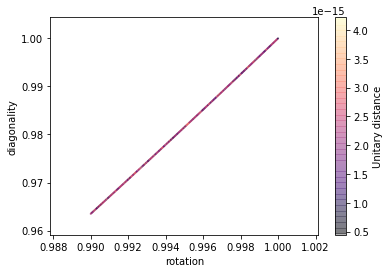

In [732]:
from scipy.linalg import fractional_matrix_power as fpow

dim = 4
start = cirq.testing.random_unitary(4)
d,V = np.linalg.eig(start) 
np.testing.assert_array_almost_equal(V @ np.diag(d) @ V.conj().T, start)

res = 1000
xs=[]
ys=[]
cs=[]
Ms=[]
for i in range(res+1):
    rot = 0.99 + i/res/100
    M = fpow(V.conj().T, rot) @ start @ fpow(V,rot)
    c = deltaU(M)
    x = rot
    y = how_diag(M)
    xs.append(x)
    ys.append(y)
    cs.append(c)
    Ms.append(M)
    
plt.axes(xlabel="rotation",ylabel="diagonality")
plt.scatter(xs,ys,c=cs,cmap="magma",alpha=0.3,s=1)
plt.colorbar().set_label('Unitary distance')
print(M)
print(np.angle(M.diagonal()))
print(rot)
np.set_printoptions(precision=20)
print(V.conj().T @ start @ V)

0.00045693534562257375


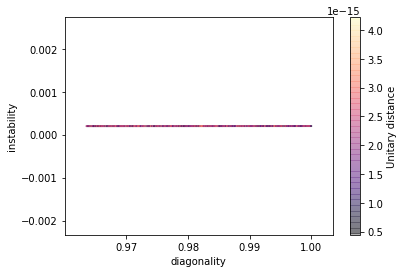

In [733]:
E = (np.random.rand(dim,dim) + 1.9j * np.random.rand(dim, dim))*1e-4
print(np.linalg.norm(E))
xs2=[]
ys2=[]
cs2=cs
for i in range(res+1):
    rot = i/res
    M = Ms[i]
    Me = M + E
    x = ys[i]
    y = instab(Me)
    xs2.append(x)
    ys2.append(y)
    
plt.axes(xlabel="diagonality",ylabel="instability")
plt.scatter(xs2,ys2,c=cs2,cmap="magma",alpha=0.3,s=1)
plt.colorbar().set_label('Unitary distance')


Huh, I think we have to find the closest unitary matrix! Look at that: https://michaelgoerz.net/notes/finding-the-closest-unitary-for-a-given-matrix.html

In [234]:
def delta_uni(A):
    """ Assuming that A is a matrix obtained from projecting a unitary matrix
        to a smaller subspace, return the loss of population of subspace, as a
        distance measure of A from unitarity.

        Result is in [0,1], with 0 if A is unitary.
    """
    return 1.0 - np.real(np.trace((A.conj().T @ A))) / len(A)

In [251]:
deltaU(start)

2.220446049250313e-16

In [538]:
def closest_unitary(A):
    """ Calculate the unitary matrix U that is closest with respect to the
        operator norm distance to the general matrix A.

        Return U as a numpy matrix.
    """
    V, __, Wh = np.linalg.svd(A)
    U = np.array(V.dot(Wh))
    return U

def deltaU(A):
    """ Calculate the operator norm distance \Vert\hat{A} - \hat{U}\Vert between
        an arbitrary matrix $\hat{A}$ and the closest unitary matrix $\hat{U}$
    """
    __, S, __ = np.linalg.svd(A)
    d = 0.0
    for s in S:
        if abs(s - 1.0) > d:
            d = abs(s-1.0)
    return d


In [256]:
closest_unitary(U+E)

array([[-5.8778525229e-01-8.0901699437e-01j,
        -4.4072392348e-16-3.4810106075e-16j,
        -3.0063676504e-16+4.9081696994e-17j,
        -9.0227705616e-17+1.3037360220e-16j],
       [ 1.9487259997e-16+5.2672250285e-16j,
        -5.8778525229e-01-8.0901699437e-01j,
         1.3877787808e-17+2.7755575616e-16j,
        -5.5511151231e-17+1.9428902931e-16j],
       [-1.3958133729e-16+2.7075547594e-16j,
        -2.7755575616e-16-2.7755575616e-17j,
        -5.8778525229e-01-8.0901699437e-01j,
        -3.8857805862e-16-9.0205620751e-17j],
       [-1.5187455832e-16+4.5523988678e-17j,
        -1.3877787808e-16-6.9388939039e-17j,
        -1.1102230246e-16+2.9143354396e-16j,
        -5.8778525229e-01-8.0901699437e-01j]])

In [244]:
deltaU(U+E)

8.881784197001252e-16

In [322]:
u1u2 = np.array([[ 8.51e-02+9.96e-01j,  2.46e-16-2.47e-16j , 1.45e-16+1.63e-17j ,-1.66e-16-3.09e-16j],
 [ 2.84e-16+2.01e-16j,  8.51e-02+9.96e-01j , 3.76e-16-2.04e-16j , 3.47e-16+2.05e-16j],
 [ 1.40e-16-4.06e-17j,  1.18e-16+1.34e-16j , 8.51e-02+9.96e-01j ,-1.08e-16+5.69e-17j],
 [-1.11e-16+3.33e-16j,  2.91e-16-2.15e-16j ,-1.23e-16-6.24e-18j , 8.51e-02+9.96e-01j]])

In [324]:
closest_unitary(u1u2)

array([[ 8.5131589255e-02+9.9636971678e-01j,
         2.4587605956e-16-2.4635716575e-16j,
         1.4491209318e-16+1.6267237827e-17j,
        -1.6594446593e-16-3.0945746509e-16j],
       [ 2.8410542125e-16+2.0107461152e-16j,
         8.5131589255e-02+9.9636971678e-01j,
         1.2490009027e-16-1.4745149546e-16j,
         3.8857805862e-16+5.5511151231e-17j],
       [ 1.4005196822e-16-4.0615070784e-17j,
         1.7173762412e-16+1.2490009027e-16j,
         8.5131589255e-02+9.9636971678e-01j,
         2.2551405188e-17+6.9388939039e-18j],
       [-1.1104120338e-16+3.3312361013e-16j,
         3.7470027081e-16-3.3306690739e-16j,
        -3.6429192996e-17-1.0408340856e-17j,
         8.5131589255e-02+9.9636971678e-01j]])

In [465]:
instab(u1u2)

0.8109380600276481

In [420]:
import pandas as pd 

rows_list=[]
for i in range(1000): 
    U = cirq.testing.random_unitary(4)
    rows_list.append({'delta':deltaU(U)})
    
df = pd.DataFrame(rows_list)
df.describe()

,delta
count,1.000000e+03
mean,3.173017e-16
std,1.392615e-16
min,0.000000e+00
25%,2.220446e-16
50%,2.220446e-16
75%,4.440892e-16
max,8.881784e-16


In [418]:
df.st()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
deltas    0 non-null float64
dtypes: float64(1)
memory usage: 0.0+ bytes


In [467]:
u1=np.array([[ 0.00+0.00j,  0.10+0.17j,  0.46+0.44j, -0.68+0.31j],
 [ 0.00+0.00j, -0.96-0.12j,  0.24-0.02j,  0.00+0.04j],
 [ 1.00+0.00j,  0.00+0.00j,  0.00+0.00j,  0.00+0.00j],
 [ 0.00+0.00j, -0.16+0.02j, -0.70+0.20j, -0.06+0.66j]])
u2=np.array([[ 1.40e-16+4.06e-17j,  1.75e-01-8.32e-02j,  4.81e-01-4.18e-01j,  2.49e-01+7.03e-01j],
 [ 1.93e-17-1.11e-16j, -2.03e-01+9.47e-01j, -3.51e-03-2.45e-01j,  4.37e-02+3.73e-03j],
 [ 8.51e-02-9.96e-01j,  4.77e-17-9.54e-17j,  1.48e-16+2.64e-17j, -1.24e-16-2.38e-17j],
 [-1.06e-16-6.81e-17j,  2.93e-03+1.56e-01j,  1.40e-01+7.17e-01j,  6.54e-01+1.17e-01j]])

In [470]:
deltaU(u1),deltaU(u2),deltaU(u1@u2.conj().T)

(0.007202387208699923, 0.00042145042814834, 0.007134158907906807)

In [471]:
instab(u1),instab(u2),instab(u1@u2.conj().T)

(0.011910405256421069, 0.0003682223186590443, 0.6515592331370403)

In [472]:
instab(closest_unitary(u1)),instab(closest_unitary(u2)),instab(closest_unitary(u1)@closest_unitary(u2).conj().T)

(1.0242077751315439e-15, 1.1107205395762968e-15, 2.8459661733069386e-13)

4.528914820036864e-08 1.6849890762109353e-16
7.993763044948716e-08 5.540780772063397e-16
8.299747168998354e-08 3.7735351027649217e-16
8.89094387414366e-07 6.132937647150558e-15
6.412731975257779e-07 5.213391648355109e-15
1.0691066136130816e-06 3.977014867668809e-15
2.00439726606237e-06 1.2322825256255168e-14
2.771647269034375e-06 1.2944300283397976e-14
5.489913836370717e-06 4.2793460517540157e-14
2.046387237375874e-05 1.4843876952751364e-13
8.002971324589913e-05 2.1264933515426435e-13
5.911346682930506e-05 2.8419974685740565e-13
0.0005030281029214194 3.881410853702857e-12
0.000330123157465137 2.699586510332236e-12
0.0005815929029875805 4.707048109706665e-12
0.0029053020287098112 2.0048849424780456e-11
0.006103665464296466 3.6379758512775553e-11
0.006816697701161416 1.0924784352034293e-11
0.05013550648324178 4.4383296934407245e-10
0.052990677252628064 5.334186427524527e-10
0.06681317095372276 3.2331856349725694e-10
0.4119536646332566 1.9210806279090775e-09
0.4408025271759947 3.179761642

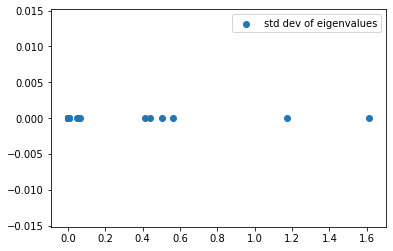

In [954]:
import random

def bins(a,b,f,tol=1e-300):
    if f(a) == f(b):
        raise Exception("Incorrect input, f(a)==f(b): {}, a={}, b={}".format(f(a),a,b))
    while np.abs(a-b) > tol:
#         print(a,b,f(a),f(b))
        mid = (a + b) / 2 
        if f(mid): 
            b = mid 
        else: 
            a = mid 
    return (a + b) / 2 
    
def sensitive(M, noise, max_err=1e-15, num_samples=100): 
    num_sensitive = 0 
    for s in range(num_samples): 
        E = (1 - np.random.rand(dim,dim) * 2 + 1.9j * np.random.rand(dim, dim)) * noise
        d, V = np.linalg.eig(M+E)
        if not np.allclose(V @ np.diag(d) @ V.conj().T, M+E, atol=max_err): 
            num_sensitive += 1
    return num_sensitive > 0.9 * num_samples
        
    
res = 8
max_std = 1 
num_samples = 3
xs = [] 
ys = [] 
for i in range(res, -1, -1): 
    for s in range(num_samples):
        r = lambda: np.exp(1j * 2 * np.pi * random.gauss(1, 10**(-i)))
        r1 = r()
        DD = np.diag([r(),r(),r(),r()]) 
        sensitivity = bins(0,1,(lambda noise: sensitive(DD,noise,1e-8)))
        x = np.std(np.angle(np.diagonal(DD)))
        y = sensitivity 
        print(x,y)
        xs.append(x)
        ys.append(y)

        
plt.scatter(xs,ys)
plt.legend(["std dev of eigenvalues", "sensitivity"])

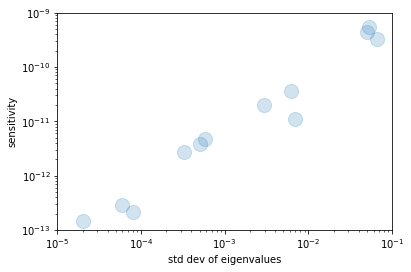

In [969]:
ax = plt.axes(xlabel="std dev of eigenvalues",ylabel="sensitivity")
ax.set_xlim([1e-5,1e-1])
ax.set_ylim([1e-13,1e-9])
plt.yscale("log")
plt.xscale("log")
offset = 9
plt.scatter(xs[offset:],ys[offset:],alpha=0.2, s=200)


it seems that we have an issue with diagonals indeed - or the standard deviation of the eigenvalues? 
If they are all the same, I'm seeing super high noise sensitivity 

In [975]:
d,V = np.linalg.eig(u1u2)
np.allclose(V @ np.diag(d) @ V.conj().T, u1u2, atol=1e-15)

False

In [982]:
V = closest_unitary(V)
np.allclose(V @ np.diag(d) @ V.conj().T, u1u2, atol=1e-15)

True

In [983]:
V

array([[ 0.9635466175+0.j          , -0.1498708881+0.1927190488j,
        -0.0762438297+0.0762227948j,  0.0187636206+0.0009442297j],
       [ 0.1452197622+0.1519212486j,  0.9280520126-0.0207130505j,
        -0.1822144435-0.1631465943j,  0.0820605014+0.1660383864j],
       [ 0.0454611337+0.0679710794j,  0.0554637562+0.0099911703j,
         0.677684276 +0.0079295068j,  0.7283205071-0.0191715908j],
       [-0.0347572464+0.1396933152j,  0.2426506987+0.1289693887j,
         0.0573135033+0.6826084944j, -0.1089888212-0.6501134434j]])